<a href="https://colab.research.google.com/github/parthasarathi1234/DL_assignment_1/blob/main/DL_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [266]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data();

4422102/4422102 [==============================] - 0s 0us/step


In [270]:
x_train_images,x_text_images,y_train_images,y_test_images=train_test_split(x_train,y_train,test_size=0.1)

In [271]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
print(x_train_images.shape,x_text_images.shape,y_train_images.shape,y_test_images.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(54000, 28, 28) (6000, 28, 28) (54000,) (6000,)


#Question1

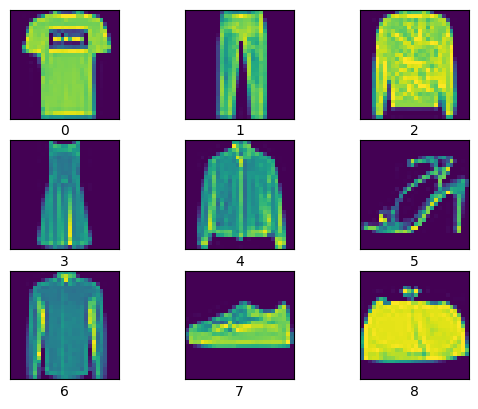

In [ ]:
n=0
i=0
while(n!=9):
  if(y_train[i]==n):
    plt.subplot(3,3,n+1)
    n=n+1

    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
  i=i+1

plt.show()

#Question 2


### weights generation

In [138]:
def weight(No_of_layers,neurons):
  weights=[]
  bias=[]


  # input layer
  weights.append(0.01*np.random.randn(neurons,784))
  bias.append(0.01*np.random.randn(neurons,1))

  # Hidden layer

  for i in range(1,No_of_layers):
    weights.append(0.01*np.random.randn(neurons,neurons))
    bias.append(0.01*np.random.randn(neurons,1))

  # output layer
  weights.append(0.01*np.random.randn(10,neurons))
  bias.append(0.01*np.random.randn(10,1))
  return weights,bias




  # for i in range(No_of_layers):
  #   neurons.append(int(input()))   # storing no of neurons in each layer

  # weights=[]
  # bias=[]


  # # input layer
  # weights.append(np.random.randn(neurons[0],784))
  # bias.append(np.random.randn(neurons[0],1))

  # # Hidden layer

  # for i in range(1,No_of_layers):
  #   weights.append(np.random.randn(neurons[i],neurons[i-1]))
  #   bias.append(np.random.randn(neurons[i],1))

  # # output layer
  # weights.append(np.random.randn(10,neurons[No_of_layers-1]))
  # bias.append(np.random.randn(10,1))
  # return weights,bias

  # print(len(weights))
  # for i in range(len(weights)):
  #   print(weights[i].shape)

  # for i in range(len(weights)):
  #   print(bias[i].shape)

### activation functions

In [177]:
def sigmoid(a):
  z=np.clip(a,-500, 500)
  return 1 / (1 + np.exp(-z))

def tanh(a):
  z=np.clip(a,-50,50)
  return np.tanh(z)

def softmax(a):
  x=1e-6
  return (np.exp(a-max(a))/(sum(np.exp(a-max(a)))+x))

def tanh_derivative(z):
  return 1-np.tanh(z)**2

def relu(Z):
    A = np.maximum(0, Z)
    return A

def relu_derivative(z):
  return np.where(z>0,1,0)

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

### forward propagation

In [272]:
def  feeb_forward(x,layers,act,wei,b):
  pre_activation=[]
  activation=[]
  z=x.flatten().reshape(784,1)/255.0
  activation.append(z)
  for i in range(layers):
    # print(weights[i].shape,z.shape,b[i].shape)

    a=b[i]+np.dot(wei[i],z)  # pre activation
    # 243/'k'
    pre_activation.append(a)
    if(act=="sigmoid"):
      z=sigmoid(a)
    elif(act=="tanh"):
      z=tanh(a)
    activation.append(z)

  a=b[layers]+np.dot(wei[layers],z)
  pre_activation.append(a)
  z=softmax(a)
  activation.append(z)
  return pre_activation,activation,z

###Backward Propagation

In [273]:
def back_propagation(x_t,y_train,z,H,A,layers,W,activation):
  update_x=x_t.reshape(784,1)/255.0
  dw=[]
  db=[]
  y=np.zeros((10,1))
  y[y_train]=1;
  loss=-np.subtract(y,z)
  for k in range(layers,0,-1):
    # print(loss.shape,H[k].shape,z.shape,y.shape)
    loss_dw=np.matmul(loss,H[k].T)

    # 243/'k'
    # print(loss_dw.shape)
    dw.append(loss_dw)

    loss_db=loss
    db.append(loss_db)

    loss_dh=np.matmul(W[k].T,loss)

    # if(k>0):
    if(activation=="tanh"):
      x=tanh_derivative(A[k-1])
    elif(activation=="sigmoid"):
      x=sigmoid_derivative(A[k-1])
    else:
      x=relu_derivative(A[k-1])
    loss=np.multiply(loss_dh,x)
    # else:
    #   loss=loss_dh
  # print("?l(loss,update_x.T).shape)
  dw.append(np.matmul(loss,update_x.T))
  db.append(loss)
  return dw,db

# Question 3

### accuracy

In [113]:
def accuracy(theta_w,theta_b,x_train,y_train,activationfun,split):
  print("accuracy")
  accuracy=0
  for i in range(int(len(x_train))):
    act,p_act,z=feeb_forward(x_train[i],3,activationfun,theta_w,theta_b)
    if(np.argmax(act[-1])==y_train[i]):
      accuracy+=1
  return (accuracy/(int(len(x_train))))*100

### stochastic gradient descent

In [309]:
def stochastic_gradient_descent(epochs,eta,layers,neurons):
  W,B=weight(layers,neurons)
  for i in range(epochs):
    dw=[[0 for colu in range(row)] for row in range(len(W))]
    db=[[0 for colu in range(row)] for row in range(len(B))]
    for j in range(54000):
      A,H,Z=feeb_forward(x_train[j],layers,"tanh",W,B)
      current_dw,current_db=back_propagation(x_train[j],y_train[j],Z,H,A,layers,W,"tanh")
      current_dw.reverse()
      current_db.reverse()
      for k in range(len(W)):
        # print(W[k].shape,current_dw[k].shape)
        W[k]=W[k]-eta*current_dw[k]
        B[k]=B[k]-eta*current_db[k]
    print(accuracy(W,B,x_train,y_train,"tanh",0.1))

In [310]:
stochastic_gradient_descent(1,0.1,3,16)

accuracy
29.81333333333333


### Momentum gradient descent

In [293]:
def momentum_gradient_descent(epochs,eta,beta,layers,neurons,activation_fun):
  W,B=weight(layers,neurons)
  pre_v_w=[0 for i in range(layers+1)]
  pre_v_b=[0 for i in range(layers+1)]
  dw=[0 for i in range(layers+1)]
  db=[0 for i in range(layers+1)]
  for j in range(54000):
    A,H,Z=feeb_forward(x_train[j],layers,activation_fun,W,B)
    current_dw,current_db=back_propagation(x_train[j],y_train[j],Z,H,A,layers,W,activation_fun)
    current_dw.reverse()
    current_db.reverse()

    for k in range(len(W)):
      dw[k]+=current_dw[k]
      db[k]+=current_db[k]
  for k in range(len(W)):
    v_w=beta*pre_v_w[k]+dw[k]
    v_b=beta*pre_v_b[k]+db[k]

    W[k]=W[k]-eta*v_w-(0.001*W[k])
    B[k]=B[k]-eta*v_b
    pre_v_w[k]=v_w
    pre_v_b[k]=v_b
  print(accuracy(W,B,x_train,y_train,activation_fun,0.1))

In [292]:
momentum_gradient_descent(1,1.0,0.9,3,16,"sigmoid")

accuracy
10.0


### Nesterov accelerated gradient descent

In [304]:
def nesterov_accelerated_gradient_descent(x_train,y_train,epochs,layers,neurons,beta,eta):
  W,B=weight(layers,neurons)
  pre_v_w=[0 for i in range(layers+1)]
  pre_v_b=[0 for i in range(layers+1)]

  v_w=[0 for i in range(layers+1)]
  v_b=[0 for i in range(layers+1)]
  for i in range(epochs):
    dw=[0 for i in range(layers+1)]
    db=[0 for i in range(layers+1)]
    for k in range(len(W)):
      W[k] = W[k] - beta * pre_v_w[k]
      B[k] = B[k] - beta * pre_v_b[k]
    for k in range(54000):
      A,H,Z=feeb_forward(x_train[k],layers,"sigmoid",W,B)
      current_dw,current_db=back_propagation(x_train[k],y_train[k],Z,H,A,layers,W,"sigmoid")
      current_dw.reverse()
      current_db.reverse()

    for k in range(len(W)):
        dw[k]+=current_dw[k]
        db[k]+=current_db[k]
        # pre_v_w[k]=eta*dw[k]+beta*pre_v_w[k]
        # pre_v_b[k]=eta*db[k]+beta*pre_v_b[k]
    for k in range(len(W)):
      v_w=beta*pre_v_w[k]+eta*dw[k]
      v_b=beta*pre_v_b[k]+eta*db[k]

      W[k]=W[k]-v_w
      B[k]=B[k]-v_b
      pre_v_w[k]=v_w
      pre_v_b[k]=v_b
    print(accuracy(W,B,x_train,y_train,"sigmoid",0.1))

In [305]:
nesterov_accelerated_gradient_descent(x_train,y_train,1,3,16,0.1,0.9)

accuracy
10.0


### rmsprop

In [306]:
def rms_prop(x_train,y_train,epochs,layers,neurons,beta,eta):
  W,B=weight(layers,neurons)
  eps=1e-4
  v_w=[0 for i in range(layers+1)]
  v_b=[0 for i in range(layers+1)]

  for i in range(epochs):
    dw=[0 for i in range(layers+1)]
    db=[0 for i in range(layers+1)]
    for j in range(54000):
      A,H,Z=feeb_forward(x_train[j],layers,"sigmoid",W,B)
      current_dw,current_db=back_propagation(x_train[j],y_train[j],Z,H,A,layers,W,"sigmoid")
      current_dw.reverse()
      current_db.reverse()

    for k in range(len(W)):
      dw[k]=dw[k]+current_dw[k]
      db[k]=db[k]+current_db[k]
    for k in range(len(W)):
      v_w[k]=beta*v_w[k]+(1-beta)*pow(dw[k],2)
      v_b[k]=beta*v_b[k]+(1-beta)*pow(db[k],2)
      W[k]=W[k]-eta*dw[k]/(np.sqrt(v_w[k])+eps)
      B[k]=B[k]-eta*db[k]/(np.sqrt(v_b[k])+eps)
    print(accuracy(W,B,x_train,y_train,"sigmoid",0.1))

In [307]:
weights,bias=weight(3,16)
rms_prop(x_train,y_train,1,3,16,0.5,0.1)

accuracy
10.0


### adam

In [207]:
def adam(x_train,y_train,epochs,eta,beta1,beta2,W,B,activation_fun,layers,weightDecay):
  v_w=[np.zeros_like(w) for w in W]
  v_b=[np.zeros_like(w) for w in B]
  m_w=[np.zeros_like(w) for w in W]
  m_b=[np.zeros_like(w) for w in B]
  eps=1e-10
  for i in range(epochs):
      dw=[np.zeros_like(w) for w in W]
      db=[np.zeros_like(w) for w in B]
      for j in range(60000):
        A,H,Z=feeb_forward(x_train[j],layers,activation_fun,W,B)
        current_dw,current_db=back_propagation(x_train[j],y_train[j],Z,H,A,layers,W,activation_fun)
        current_dw.reverse()
        current_db.reverse()
      for k in range(len(W)):
        dw[k]=dw[k]+current_dw[k]
        db[k]=db[k]+current_db[k]
      for k in range(len(W)):
        m_w[k]=beta1*m_w[k]+(1-beta1)*dw[k]
        m_b[k]=beta1*m_b[k]+(1-beta1)*db[k]
        v_w[k]=beta2*v_w[k]+(1-beta2)*pow(dw[k],2)
        v_b[k]=beta2*v_b[k]+(1-beta2)*pow(db[k],2)

        m_w_hat=m_w[k]/(1-pow(beta1,k+1))
        m_b_hat=m_b[k]/(1-pow(beta1,k+1))
        v_w_hat=v_w[k]/(1-pow(beta2,k+1))
        v_b_hat=v_b[k]/(1-pow(beta2,k+1))

        W[k]=W[k]-eta*m_w_hat/(np.sqrt(v_w_hat)+eps) - (weightDecay*W[k])
        B[k]=B[k]-eta*m_b_hat/(np.sqrt(v_b_hat)+eps)
      print(accuracy(W,B,x_train,y_train,activation_fun,0.1))

In [208]:
weights,bias=weight(3,16)
adam(x_train,y_train,1,0.1,0.9,0.999,weights,bias,"sigmoid",3,0)

accuracy
10.0


### nadam

In [205]:
def nadam(x_train,y_train,eta,beta1,beta2,layers,epochs,W,B,activation_fun):
  v_w=[np.zeros_like(w) for w in W]
  v_b=[np.zeros_like(w) for w in B]
  m_w=[np.zeros_like(w) for w in W]
  m_b=[np.zeros_like(w) for w in B]
  eps=1e-10
  for i in range(epochs):
    dw=[np.zeros_like(w) for w in W]
    db=[np.zeros_like(w) for w in B]
    for j in range(60000):
      A,H,Z=feeb_forward(x_train[j],layers,activation_fun,W,B)
      current_dw,current_db=back_propagation(x_train[j],y_train[j],Z,H,A,layers,W,activation_fun)
      current_dw.reverse()
      current_db.reverse()

    for k in range(len(W)):
      dw[k]+=current_dw[k]
      db[k]+=current_db[k]

    for k in range(len(W)):
      m_w[k]=beta1*m_w[k]+(1-beta1)*dw[k]
      m_b[k]=beta1*m_b[k]+(1-beta1)*db[k]
      v_w[k]=beta2*v_w[k]+(1-beta2)*pow(dw[k],2)
      v_b[k]=beta2*v_b[k]+(1-beta2)*pow(db[k],2)

      m_w_hat=m_w[k]/(1-pow(beta1,i+1))
      m_b_hat=m_b[k]/(1-pow(beta1,i+1))
      v_w_hat=v_w[k]/(1-pow(beta2,i+1))
      v_b_hat=v_b[k]/(1-pow(beta2,i+1))

      W[k]=W[k]-(eta/(np.sqrt(v_w_hat+eps)))*(beta1*m_w_hat+(1-beta1)*dw[k]/(1-beta1**(k+1)))
      B[k]=B[k]-(eta/(np.sqrt(v_b_hat+eps)))*(beta1*m_b_hat+(1-beta1)*db[k]/(1-beta1**(k+1)))
    print(accuracy(W,B,x_train,y_train,activation_fun,0.1))


In [206]:
weights,bias=weight(3,16)
nadam(x_train,y_train,0.1,0.9,0.99,3,1,weights,bias,"sigmoid")

accuracy
10.0


###all

In [279]:
stochastic_gradient_descent(x_train,y_train,1,0.1,3,16)

momentum_gradient_descent(x_train,y_train,1,weights,bias,1.0,0.9,3)

nesterov_accelerated_gradient_descent(x_train,y_train,weights,bias,1,3,0.9,0.9)

rms_prop(x_train,y_train,weights,bias,1,3,0.5,0.1)

weights,bias=weight(3,16)
adam(x_train,y_train,1,0.1,0.9,0.999,weights,bias,"sigmoid",3,0)

weights,bias=weight(3,16)
nadam(x_train,y_train,0.1,0.9,0.99,3,1,weights,bias,"sigmoid")

accuracy
34.71333333333334
accuracy
10.0
accuracy
10.0
accuracy
10.0
accuracy
10.0
accuracy
10.0
accuracy
10.0
accuracy


KeyboardInterrupt: 

In [ ]:
epochs=1
layers=3
neurons=16
learningRate=0.001
batchSize=100

In [ ]:
def main_function(epochs,layers,neurons,learningRate,optimizer,batchSize,activationFun):
  if(optimizer=="SGD"):
    stochastic_gradient_descent(epochs,learningRate,layers,neurons)
  elif(optimizer=="MGD"):
    momentum_gradient_descent()

In [308]:
!pip install wandb
import wandb
wandb.login()
wandb.init(project="cs23m035_DL_Assignment1")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: cs23m035. Use `wandb login --relogin` to force relogin
